# All Sales Dataset: Exploratory Data Analysis

In this notebook, we're going to analyse the All Sale dataset from DICT. The dataset is meant for exploratory analysis at this stage.

We'll try to answer the following questions:

1. Which month had the highest sale?
2. What is the monthly sales trend?
3. Which product sold the most?
4. How are the other products doing?

### Pandas Tutorial

#### Imported libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Create a dataframe, sales, from a csv file, all_sales.
#### Check sales dataframe information using the info() method. 
#### Display 5 rows and all the columns of the dataframe using head() method.

In [4]:
sales = pd.read_csv("all_sales.csv")

sales.info()

sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

#### Check the total number of blank rows

In [5]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### remove all nulls/blanks using the dropna() method

In [6]:
sales = sales.dropna()
sales.info()
sales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Now that we remove the nulls, we need to answer the questions in our dataset

In order to do that we need display the info and our dataset

In [7]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Create the Month Column from the Order Date Column

In [8]:
sales['Month'] = sales['Order Date'].str[0:2]
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Convert data type of Month Column from object to integer

In [9]:
sales['Month'] = sales['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

#### Create Or_dump dataframe to check the "Or's" in the Month Column

In [10]:
Or_dump = sales[sales['Month'] == "Or"]
Or_dump.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


#### Remove "Or's" from the Month Column

In [11]:
sales = sales[sales['Month'] != 'Or']
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Convert Quantity Ordered and Price Each columns to the correct data type

In [12]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.3+ MB


#### Add Sales Column

In [13]:
sales['Sales'] = sales['Quantity Ordered']*sales['Price Each']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


# -

#### 1. Which month had the highest sale?What is the monthly sales trend?

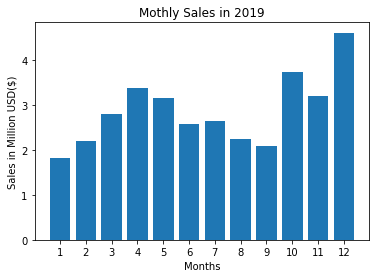

In [14]:
months = range(1,13)
plt.bar(months,sales.groupby(['Month']).sum()['Sales']/1000000) #bar graph

plt.title("Mothly Sales in 2019")
plt.ylabel('Sales in Million USD($)')
plt.xlabel('Months')

plt.xticks(months)

plt.show()

The 12th month record had the highest sale in 2019.

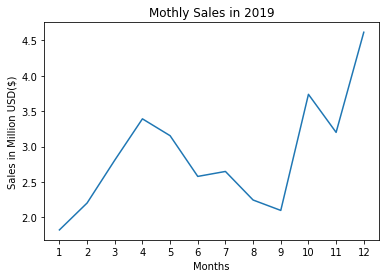

In [15]:
months = range(1,13)
plt.plot(months,sales.groupby(['Month']).sum()['Sales']/1000000) # line graph

plt.title("Mothly Sales in 2019")
plt.ylabel('Sales in Million USD($)')
plt.xlabel('Months')

plt.xticks(months)

plt.show()

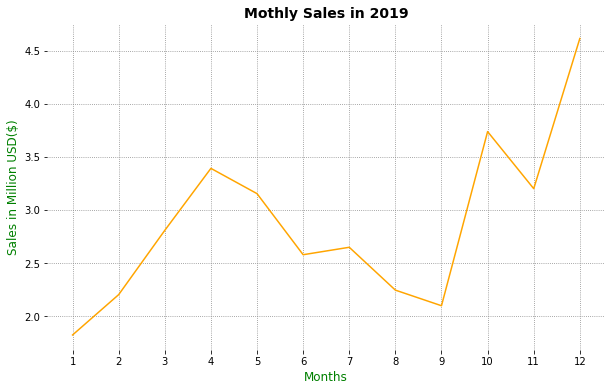

In [16]:
fig = plt.figure(figsize = (10,6))

months = range(1,13)
plt.plot(months,sales.groupby(['Month']).sum()['Sales']/1000000, color = 'orange')

plt.title("Mothly Sales in 2019", fontsize = 14, fontweight='bold')
plt.ylabel('Sales in Million USD($)', fontsize=12, color="green")
plt.xlabel('Months',fontsize=12,color="green")

plt.xticks(months)

plt.grid(True, color='grey', linestyle=':')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In monthly sales, we can see an upward trend movement from September to December. We can assume that customers have been buying products in upcoming Christmas.

#### 2. Which product sold the most?How are the other products doing?

In [17]:
product_group = sales.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129,451068.99,454148.71
27in 4K Gaming Monitor,6244,2429637.70,2435097.56
27in FHD Monitor,7550,1125974.93,1132424.50
34in Ultrawide Monitor,6199,2348718.19,2355558.01
AA Batteries (4-pack),27635,79015.68,106118.40
AAA Batteries (4-pack),31017,61716.59,92740.83
Apple Airpods Headphones,15661,2332350.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,1345565.43
Flatscreen TV,4819,1440000.00,1445700.00


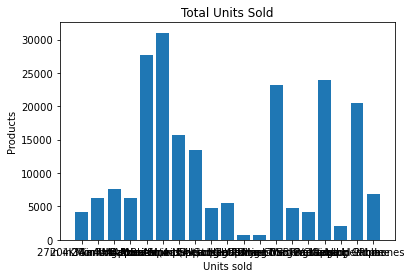

In [18]:
product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)

plt.title("Total Units Sold", fontsize = 12)
plt.ylabel('Products')
plt.xlabel('Units sold')

plt.xticks(products)

plt.show()

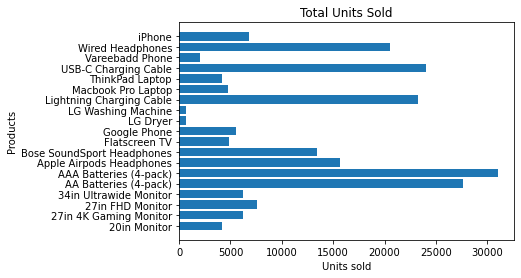

In [19]:
product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.barh(products, quantity_ordered)

plt.title("Total Units Sold", fontsize = 12)
plt.ylabel('Products')
plt.xlabel('Units sold')

plt.yticks(products)

plt.show()

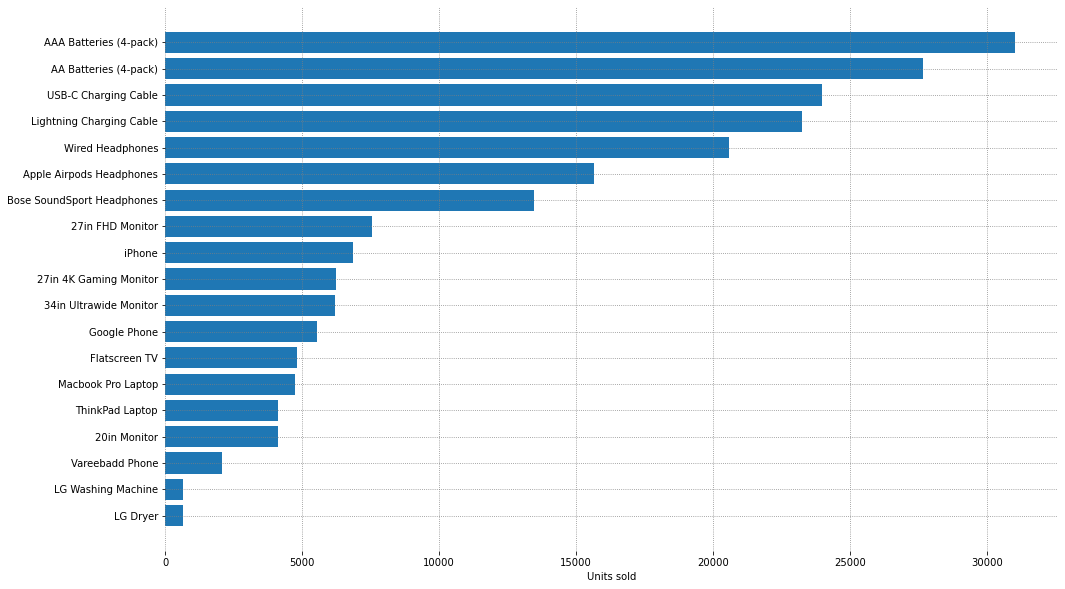

In [20]:
fir = plt.figure(figsize = (16,10))

product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

sort_sum = quantity_ordered.sort_values(ascending = True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum['Product']
quantity = sort_sum['Quantity Ordered']

plt.barh(product, quantity)

plt.xlabel('Units sold')
plt.yticks(product, size=10)

plt.grid (True, color = 'grey', linestyle = ':')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

AAA Batteries (4-pack) sold the most in the product list follow up by AA Batteries and Charger cables. The least products sold are product with higher price in our product lists such as Dryer, washing machine phones and Laptops.

# Subplots

Continuation in Module 4 Visualize-Data-with-Python-DICT

#### Create hphone dataframe from the sort sum dataframe

Find the product using .isin() method

In [21]:
hphone = sort_sum[sort_sum["Product"].isin(['Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Wired Headphones'])]

hphone

,Product,Quantity Ordered
12,Bose SoundSport Headphones,13457
13,Apple Airpods Headphones,15661
14,Wired Headphones,20557


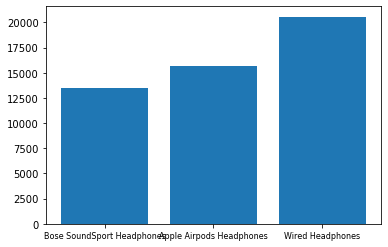

In [25]:
# create bargraph for products
h_product = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.bar(h_product, h_quantity)
plt.xticks(h_product, size = 8)

plt.show()

#### Create phone dataframe from the sort sum dataframe

In [26]:
phone = sort_sum[sort_sum["Product"].isin(['Google Phone', 'Vareebadd Phone', 'iPhone' ])]

phone

,Product,Quantity Ordered
2,Vareebadd Phone,2068
7,Google Phone,5532
10,iPhone,6849


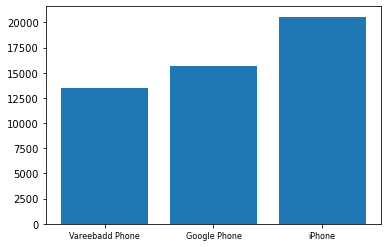

In [27]:
# create bargraph for phone products
p_product = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.bar(p_product, h_quantity)
plt.xticks(p_product, size = 8)

plt.show()

#### Subplot : Side-by-side graphs

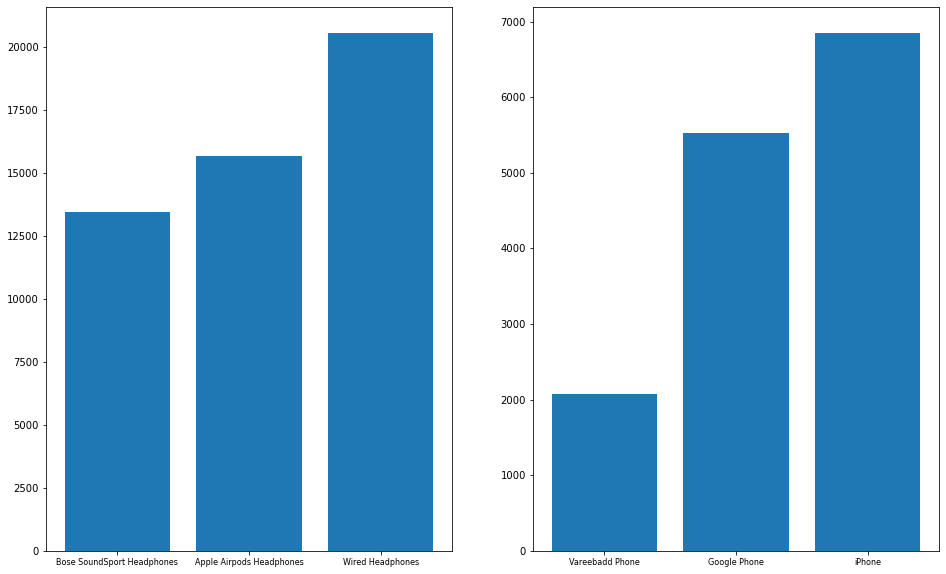

In [29]:
fig = plt.figure(figsize = (16,10))

#plot 1:
h_phone = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(1, 2, 1)

plt.bar(h_product, h_quantity)
plt.xticks(h_product, size = 8)

#plot 2:
p_phone = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(1, 2, 2)

plt.bar(p_product, p_quantity)
plt.xticks(p_product, size = 8)

plt.show()

#### Placing the correct scale

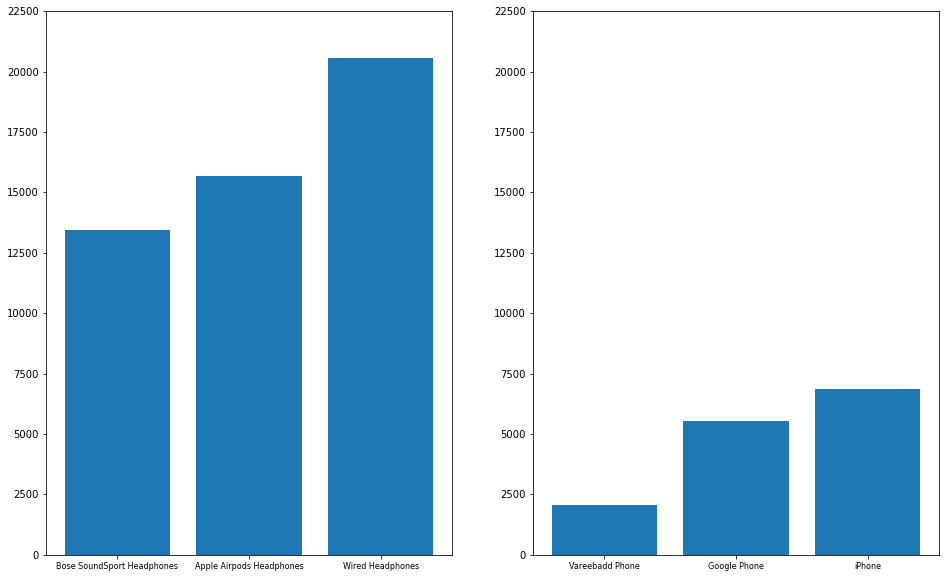

In [30]:
fig = plt.figure(figsize = (16,10))

#plot 1:
h_phone = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(1, 2, 1)

plt.bar(h_product, h_quantity)
plt.xticks(h_product, size = 8)
plt.ylim(0, 22500)

#plot 2:
p_phone = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(1, 2, 2)

plt.bar(p_product, p_quantity)
plt.xticks(p_product, size = 8)
plt.ylim(0, 22500)

plt.show()

#### Subplot : top-bottom graphs

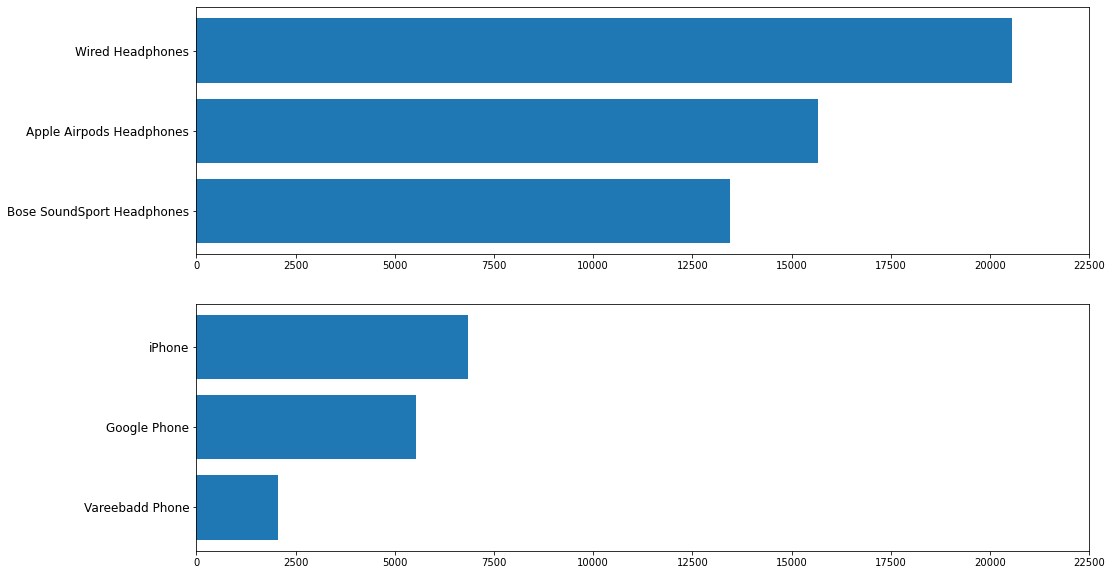

In [37]:
fig = plt.figure(figsize = (16,10))

#plot 1:
h_phone = hphone['Product']
h_quantity = hphone['Quantity Ordered']

plt.subplot(2, 1, 1)

plt.barh(h_product, h_quantity)
plt.yticks(h_product, size = 12)
plt.xlim(0, 22500)

#plot 2:
p_phone = phone['Product']
p_quantity = phone['Quantity Ordered']

plt.subplot(2, 1, 2)

plt.barh(p_product, p_quantity)
plt.yticks(p_product, size = 12)
plt.xlim(0, 22500)

plt.show()

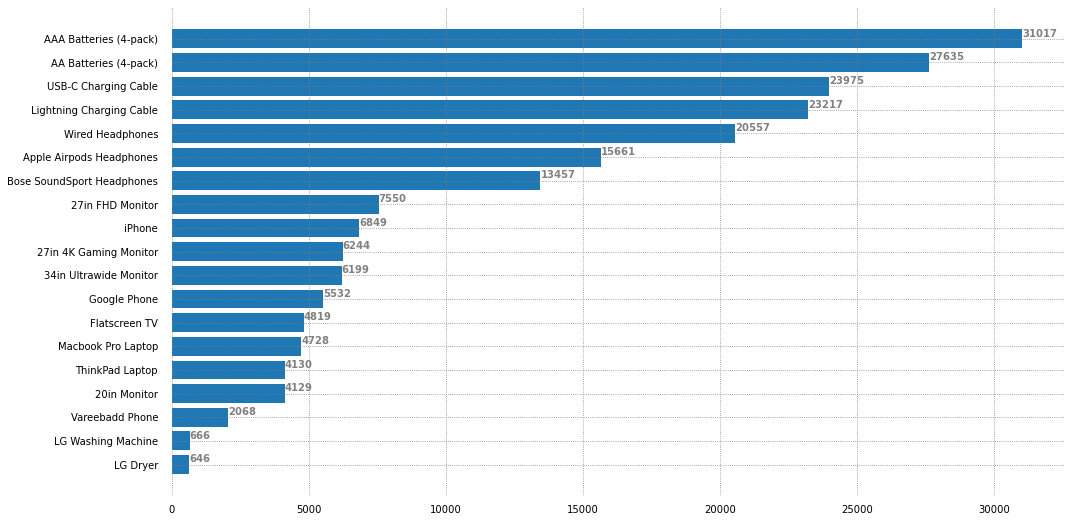

In [54]:
#### Subplots

fig, ax = plt.subplots(figsize = (16, 9))

product_group = sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

sort_sum = quantity_ordered.sort_values(ascending = True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum['Product']
quantity = sort_sum['Quantity Ordered']

ax.barh(product, quantity)

# Add y values to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
    str(round((i.get_width()), 2)),
    fontsize = 10, fontweight = 'bold', color = 'grey')

# remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add x, y gridlines
ax.grid(visible = True, color = 'grey', 
        linestyle = ':')

# Add padding/spaces between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# remove axes spines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()